# Feature preprocessing, Feature selection and interactions

In [1]:
%matplotlib inline
from preamble import *

# Representing Data and Engineering Features

## Categorical Variables

### One-Hot-Encoding (Dummy variables)

In [2]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None and provide the column names explicitly in "names"
data = pd.read_csv("./data/adult.csv")

In [3]:
data.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### select the columns we need

In [4]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [5]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### Checking string-encoded categorical data

In [6]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

#### use info and  describe function to know your data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
gender            32561 non-null object
hours-per-week    32561 non-null int64
occupation        32561 non-null object
income            32561 non-null object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [8]:
data.describe() #you can use it on single column

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [9]:
data.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [10]:
print("Original features:\n", list(data.columns), "\n")

('Original features:\n', ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'], '\n')


#### make one-hot feature on categorical features

In [11]:
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

('Features after get_dummies:\n', ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occu

In [12]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


#### get the info we want as features

In [13]:
# Get only the columns containing features, that is all columns from 'age' to 'occupation_ Transport-moving'
# This range contains all the features but not the target

features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [14]:
# extract numpy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print(X.shape, y.shape)

((32561, 44), (32561,))


#### use logistic regerssion to classify income type

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.808745854318


### When using one-hot encoding, please pay attention to data type

In [16]:
# create a dataframe with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [17]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [18]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


## Binning, Discretization

In [19]:
np.set_printoptions(precision=2)
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)

which_bin = np.digitize(X, bins=bins)
print("Data points:", X[:5])
print("\n")
print("Bin membership for data points:", which_bin[:5])
print("\n")

('Data points:', array([[-0.75],
       [ 2.7 ],
       [ 1.39],
       [ 0.59],
       [-2.06]]))


('Bin membership for data points:', array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]]))




In [21]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:


In [22]:
X_binned.shape

(100, 10)

## Interactions and Polynomials

In [23]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [24]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [25]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
poly = PolynomialFeatures(degree=10)
poly.fit(X)
X_poly = poly.transform(X)

In [26]:
X_poly.shape

(100, 11)

In [27]:
poly.get_feature_names()

['1',
 'x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10']

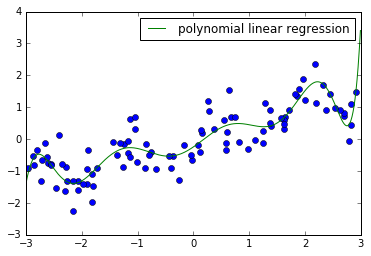

In [28]:
from sklearn.linear_model import LinearRegression
plt.plot(X[:, 0], y, 'o')  
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.legend(loc="best")

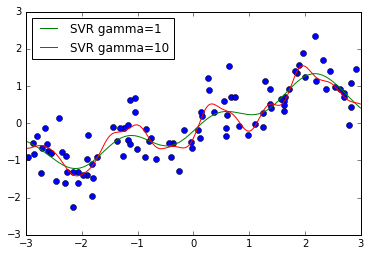

In [29]:
from sklearn.svm import SVR
plt.plot(X[:, 0], y, 'o')

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma=%d' % gamma)
    
plt.legend(loc="best")

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [32]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("score without interactions: %f" % ridge.score(X_test_scaled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print("score with interactions: %f" % ridge.score(X_test_poly, y_test))

score without interactions: 0.621370
score with interactions: 0.753423


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("score without interactions: %f" % rf.score(X_test_scaled, y_test))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("score with interactions: %f" % rf.score(X_test_poly, y_test))

score without interactions: 0.780631
score with interactions: 0.782900


In [35]:
rf.apply(X_test_poly)

array([[ 67, 119,  51, ...,  85,  18, 127],
       [286, 201,  42, ..., 258,   5, 242],
       [175, 142, 191, ..., 262, 184, 230],
       ..., 
       [198, 142, 134, ..., 185,  91, 204],
       [327, 280, 220, ..., 319, 203, 289],
       [100,  84, 400, ..., 150, 414, 113]])

In [36]:
rf.apply(X_test_poly).shape

(127, 100)

## Univariate Non-linear transformations

In [37]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [38]:
np.bincount(X[:, 0])

array([16, 28, 67, 60, 59, 59, 57, 42, 48, 46, 43, 35, 30, 29, 35, 22, 25,
       17, 19, 21, 15, 12, 16,  8, 11, 14, 15,  8,  8,  7,  8,  8,  5,  4,
        7,  7,  1,  3,  2,  3,  4,  5,  4,  3,  2,  0,  4,  2,  4,  0,  0,
        4,  1,  3,  3,  3,  3,  0,  0,  1,  0,  7,  0,  2,  1,  2,  0,  0,
        1,  1,  1,  1,  0,  1,  1,  0,  2,  0,  0,  1,  1,  2,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1])

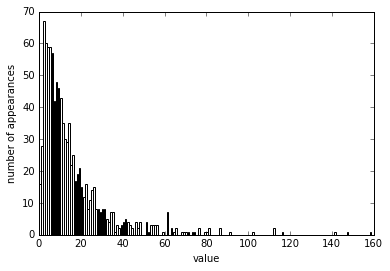

In [39]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("number of appearances")
plt.xlabel("value")

In [40]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
Ridge().fit(X_train, y_train).score(X_test, y_test)

0.5924933684332192

In [41]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

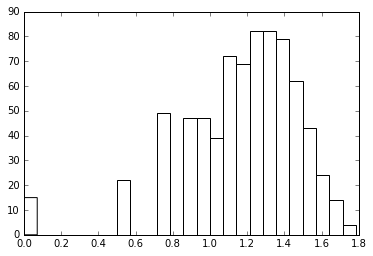

In [42]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='w');

In [43]:
Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

0.88111178978860061

## Automatic Feature Selection
### Univariate statistics

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 10% of features:
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 40)


In [45]:
from sklearn.feature_selection import f_classif, f_regression, chi2

In [46]:
F, p = f_classif(X_train, y_train)

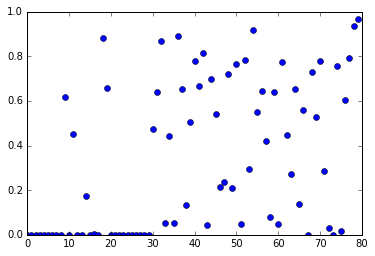

In [47]:
plt.figure()
plt.plot(p, 'o')

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


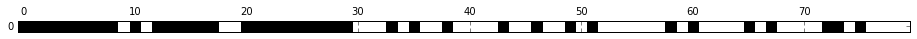

In [48]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [49]:
from sklearn.linear_model import LogisticRegression

# transform test data:
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: %f" % lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: %f" % lr.score(X_test_selected, y_test))

Score with all features: 0.929825
Score with only selected features: 0.940351


### Model-based Feature Selection

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [51]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


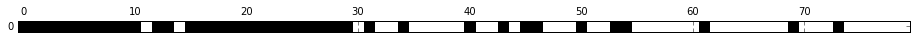

In [52]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [53]:
X_test_l1 = select.transform(X_test)
LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

0.9508771929824561

### Recursive Feature Elimination

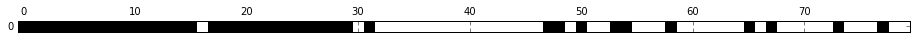

In [54]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [55]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

0.9508771929824561

In [56]:
select.score(X_test, y_test)

0.9508771929824561

# Exercises
Choose either the Boston housing dataset or the adult dataset. Compare a linear model with interaction features against one without interaction features.
Use feature selection to determine which interaction features were most important.

In [59]:
data = pd.read_csv("data/adult.csv")
y = data.income.values
X = pd.get_dummies(data.drop("income", axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [60]:
LogisticRegression().fit(X_train_, y_train).score(X_test_, y_test)

0.84842156983171602

In [61]:
X_train.shape

(24420, 108)

In [62]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold="5 * median")
X_train_selected = select.fit_transform(X_train_, y_train)
X_test_selected = select.transform(X_test_)

In [63]:
LogisticRegression().fit(X_train_selected, y_train).score(X_test_selected, y_test)

0.84387667362731855

In [64]:
X_train_selected.shape

(24420, 17)

In [65]:
poly = PolynomialFeatures(degree=2).fit(X_train_selected)
X_train_selected_poly = poly.transform(X_train_selected)
X_test_selected_poly = poly.transform(X_test_selected)

In [66]:
lr = LogisticRegression(C=0.01, penalty="l1").fit(X_train_selected_poly, y_train)
lr.score(X_test_selected_poly, y_test)

0.8226262129959464

In [67]:
np.array(poly.get_feature_names(X.columns[select.get_support()]))[lr.coef_.ravel() != 0]

array(['1', 'capital-gain', 'marital-status_ Married-civ-spouse',
       'marital-status_ Never-married', 'occupation_ Exec-managerial',
       'occupation_ Prof-specialty', 'age gender_ Male', 'education-num^2',
       'education-num marital-status_ Married-civ-spouse',
       'hours-per-week marital-status_ Married-civ-spouse',
       'hours-per-week gender_ Male',
       'workclass_ Private education_ Bachelors',
       'workclass_ Private marital-status_ Never-married',
       'marital-status_ Married-civ-spouse^2',
       'marital-status_ Never-married^2', 'occupation_ Exec-managerial^2',
       'occupation_ Prof-specialty^2'], 
      dtype='|S64')